In [1]:
## Importing pacakges/Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Importing file
df=pd.read_csv('S:\ML\Datasets\Clustering\dataset_21_car.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Checking dataset Information

In [3]:
df.shape

(1728, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [6]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,4,big,med,unacc
freq,432,432,432,576,576,576,1210


In [7]:
df['buying'].value_counts()

med      432
vhigh    432
high     432
low      432
Name: buying, dtype: int64

In [8]:
df['maint'].value_counts()

med      432
vhigh    432
high     432
low      432
Name: maint, dtype: int64

In [9]:
df['doors'].value_counts()

3        432
4        432
5more    432
2        432
Name: doors, dtype: int64

In [10]:
df['persons'].value_counts()

4       576
more    576
2       576
Name: persons, dtype: int64

In [11]:
df['lug_boot'].value_counts()

big      576
med      576
small    576
Name: lug_boot, dtype: int64

In [12]:
df['safety'].value_counts()

med     576
high    576
low     576
Name: safety, dtype: int64

In [13]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [14]:
## Checking Missing Values
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [15]:
## Checking Duplicate values
df.duplicated().sum()

0

In [16]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

### Label Encoder

In [17]:
### Using label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']]=df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 
                                                                               'safety', 'class']].apply(le.fit_transform)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [18]:
df.dtypes

buying      int32
maint       int32
doors       int32
persons     int32
lug_boot    int32
safety      int32
class       int32
dtype: object

<AxesSubplot:>

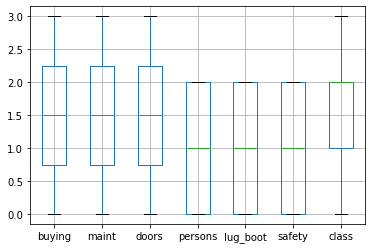

In [19]:
## Checking Outliers
df.boxplot()

### PCA for data decomposition


In [20]:
x=df.drop(columns='class')

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
PCA_car=pca.fit_transform(x)

In [22]:
PCA_car

array([[ 1.5,  1.5],
       [ 1.5,  1.5],
       [ 1.5,  1.5],
       ...,
       [-0.5, -1.5],
       [-0.5, -1.5],
       [-0.5, -1.5]])

In [23]:
P=pd.DataFrame(PCA_car)
P

,0,1
0,1.5,1.5
1,1.5,1.5
2,1.5,1.5
3,1.5,1.5
4,1.5,1.5
...,...,...
1723,-0.5,-1.5
1724,-0.5,-1.5
1725,-0.5,-1.5
1726,-0.5,-1.5


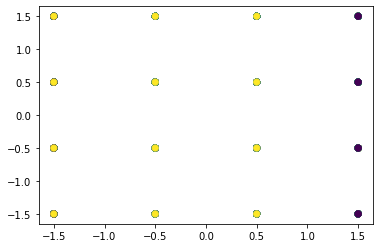

In [25]:
plt.scatter(P[0],P[1],c=df['class'])

## 1.KMeans Clustering

In [26]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Cluster vs Inertia')

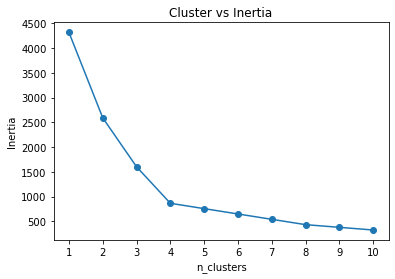

In [27]:
k=range(1,11)
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(P)
    ssd.append(model.inertia_)
    
plt.plot(k,ssd,marker='o')
plt.xlabel('n_clusters')
plt.ylabel('Inertia')
plt.xticks(k)
plt.title('Cluster vs Inertia')

4 is consider as optimal cluster value

In [28]:
model=KMeans(n_clusters=4)
model.fit(P)

KMeans(n_clusters=4)

In [29]:
model.labels_

array([3, 3, 3, ..., 0, 0, 0])

In [30]:
df1=P
df1['class']=df['class']
df1['cluster_1']=model.labels_
df1

,0,1,class,cluster_1
0,1.5,1.5,2,3
1,1.5,1.5,2,3
2,1.5,1.5,2,3
3,1.5,1.5,2,3
4,1.5,1.5,2,3
...,...,...,...,...
1723,-0.5,-1.5,1,0
1724,-0.5,-1.5,3,0
1725,-0.5,-1.5,2,0
1726,-0.5,-1.5,1,0


In [31]:
centroid=model.cluster_centers_
centroid

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

In [32]:
model.n_iter_

3

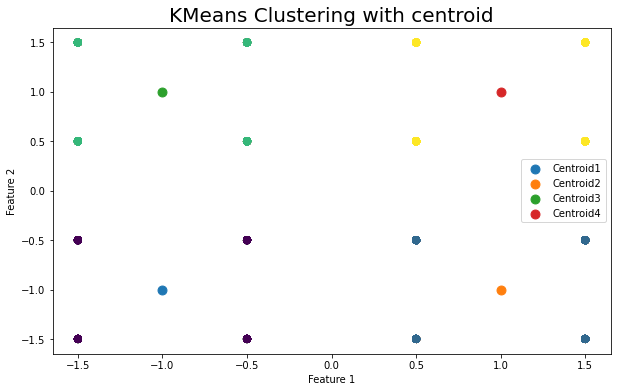

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(P.iloc[:,0],P.iloc[:,1],c=model.labels_,s=50)
for i in range(len(centroid)):
    plt.scatter(centroid[i][0],centroid[i][1],label='Centroid'+str(i+1),s=80)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.title('KMeans Clustering with centroid',fontsize=20)
plt.legend()

## 2.Hierarchical Agglomeritve Clustering

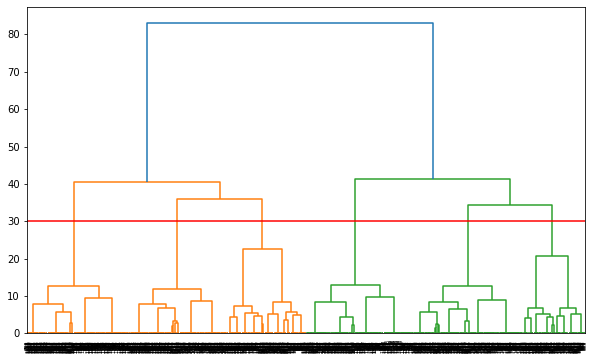

In [34]:
from scipy.cluster import hierarchy
plt.figure(figsize=(10,6))
den=hierarchy.dendrogram(hierarchy.linkage(P,method='ward'))
plt.axhline(y=30,color='r')

6 is selected as optimum cluster value.

In [35]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=6)
model.fit(P)

AgglomerativeClustering(n_clusters=6)

In [36]:
model.labels_

array([2, 2, 2, ..., 4, 0, 4], dtype=int64)

In [37]:
df1['cluster_2']=model.labels_
df1

,0,1,class,cluster_1,cluster_2
0,1.5,1.5,2,3,2
1,1.5,1.5,2,3,2
2,1.5,1.5,2,3,2
3,1.5,1.5,2,3,2
4,1.5,1.5,2,3,2
...,...,...,...,...,...
1723,-0.5,-1.5,1,0,0
1724,-0.5,-1.5,3,0,4
1725,-0.5,-1.5,2,0,4
1726,-0.5,-1.5,1,0,0


Text(0, 0.5, 'Feature 2')

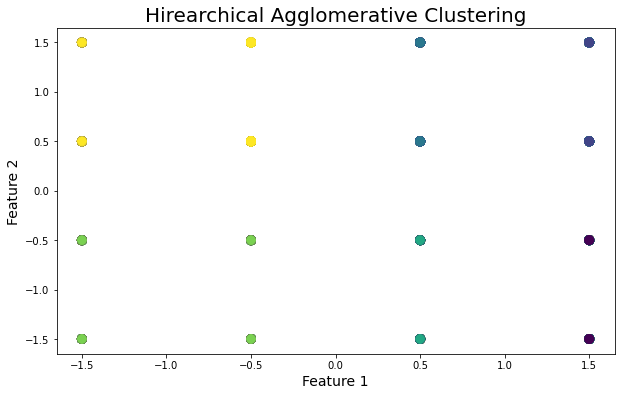

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(P[0],P[1],c=model.labels_,s=80)
plt.title('Hirearchical Agglomerative Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)

## DBSCAN

#### K distance graph

In [39]:
from sklearn.neighbors import NearestNeighbors
n=NearestNeighbors(n_neighbors=2)
nbrs=n.fit(P)
distance,indices=nbrs.kneighbors(P)

[[0.00000000e+00 4.75196206e-15]
 [0.00000000e+00 4.93019033e-15]
 [0.00000000e+00 5.29659003e-15]
 ...
 [0.00000000e+00 5.55111512e-17]
 [0.00000000e+00 5.55111512e-17]
 [0.00000000e+00 1.11022302e-16]]


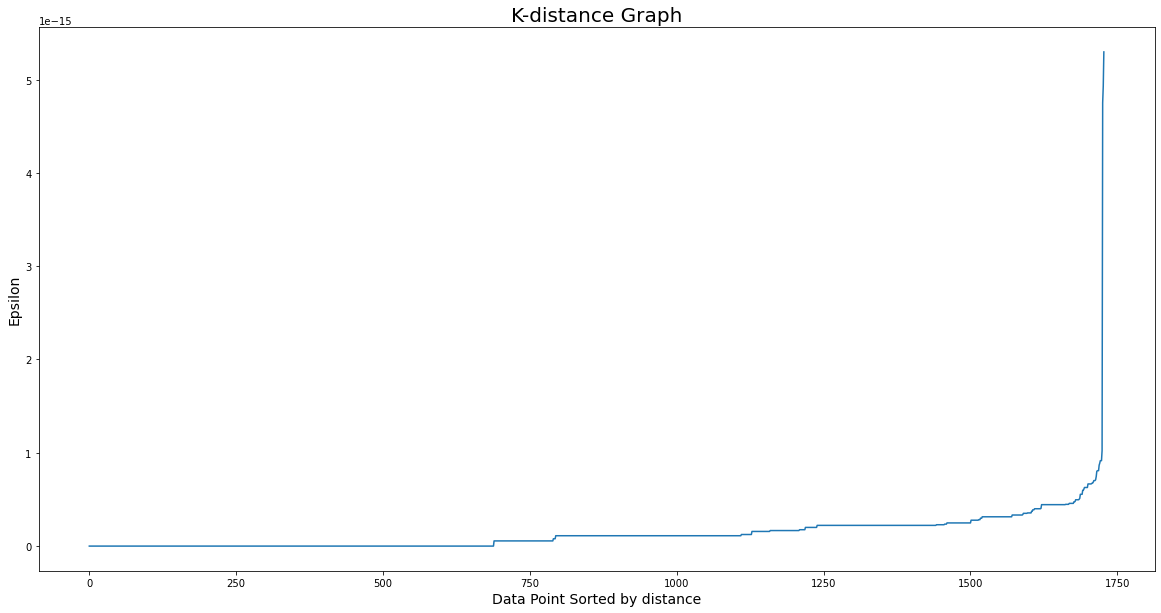

In [40]:
plt.figure(figsize=(20,10))
distances=np.sort(distance,axis=0)
distances=distances[:,1]
print(distance)
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Point Sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [41]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=0.3,min_samples=4)
model.fit(P)

DBSCAN(eps=0.3, min_samples=4)

In [42]:
model.labels_

array([ 0,  0,  0, ..., 22, 42, 43], dtype=int64)

In [43]:
df1['cluster_3']=model.labels_
df1

,0,1,class,cluster_1,cluster_2,cluster_3
0,1.5,1.5,2,3,2,0
1,1.5,1.5,2,3,2,0
2,1.5,1.5,2,3,2,0
3,1.5,1.5,2,3,2,0
4,1.5,1.5,2,3,2,0
...,...,...,...,...,...,...
1723,-0.5,-1.5,1,0,0,42
1724,-0.5,-1.5,3,0,4,43
1725,-0.5,-1.5,2,0,4,22
1726,-0.5,-1.5,1,0,0,42


Text(0, 0.5, 'Feature 2')

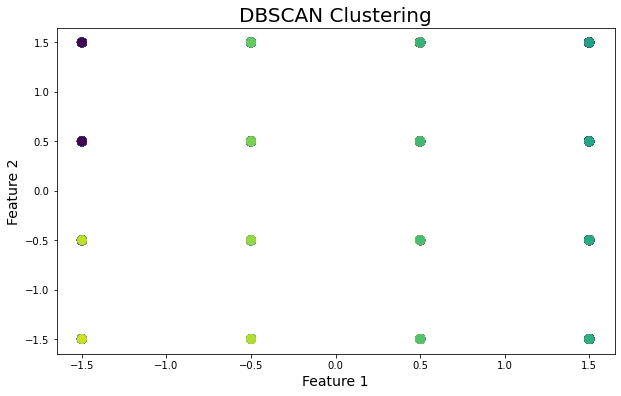

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(P.iloc[:,0],P.iloc[:,1],c=model.labels_,s=80)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)

## Final Cluster Value Comparison
    cluster_1=KMeans Label
    cluster_2=Hierarchical Agglomerative Labels
    cluster_3=DBScan labels
    label=Original data class labels

In [45]:
df1

,0,1,class,cluster_1,cluster_2,cluster_3
0,1.5,1.5,2,3,2,0
1,1.5,1.5,2,3,2,0
2,1.5,1.5,2,3,2,0
3,1.5,1.5,2,3,2,0
4,1.5,1.5,2,3,2,0
...,...,...,...,...,...,...
1723,-0.5,-1.5,1,0,0,42
1724,-0.5,-1.5,3,0,4,43
1725,-0.5,-1.5,2,0,4,22
1726,-0.5,-1.5,1,0,0,42


DBSCAN clustering gives the perfect cluster prediction.if we compare class and cluster_3 it every class belongs to same cluster group.

After DBSCAN,Hirearchical Agglomertive model gives little bit good prediction